# Data Analysis Project: **Stroke Prediction**

#### *Submitted by:* **Sarah Camille R. Aqui**

# About the Dataset


I have chosen the Stroke Prediction Dataset from Kaggle by FEDESORIANO, and it was last updated four years ago. This dataset has 12 columns.

| Variable          | Description                                                      |
| ------------------| ---------------------------------------------------------------- |
|id                 | Patient identifier                                               |
|age                | Patient's age                                                    |
|gender             | Gender ( Male, Female, or Other )                                |
|hypertension       | 0 if the patient does not have it; 1 for yes                     |
|heart_disease      | 0 if the patient does not have it; 1 for yes                     |
|ever_married       | If the patient was ever married ( yes or no )                    |
|work_type          | Children, Govt_job, Never_worked, Private, or Self-employed      |
|Residence_type     | Residence type of the patient ( Rural or Urban )                 |
|ave_glucose_level  | The average glucose level of the patient                         |
|bmi                | The patient's body mass index                                    |
|smoking_status     | If the patient formerly smoked, never smoked, smokes, or unknown |
|stroke             | 0 if the patient didn't have a stroke; 1 for yes                 |

*Note:* Unknown in the smoking_status means the information is unavailable for the patient.

## **Importing the Necessary Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
# 1. Read the CSV file into a pandas DataFrame
file_path = 'data.csv'
df = pd.read_csv(file_path)

# 2. Print the first 5 rows to verify correct loading
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## **Exploratory Data Analysis**

### Data Distributions

In [5]:
# 1. Check for missing values and duplicate entries

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
print("\n")

# Check for duplicate rows
duplicate_entries = df.duplicated().sum()
print(f"Number of Duplicate Entries: {duplicate_entries}")
print("\n")

# 2. Generate statistical description of all features (including object types)
print("Statistical Description of the Dataset (Including Object Types):")
print(df.describe(include='all'))


Missing Values in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Number of Duplicate Entries: 0


Statistical Description of the Dataset (Including Object Types):
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080

### Outlier Analysis

Missing BMI Values: 201 out of 5110 entries
Percentage of Missing BMI Values: 3.93%


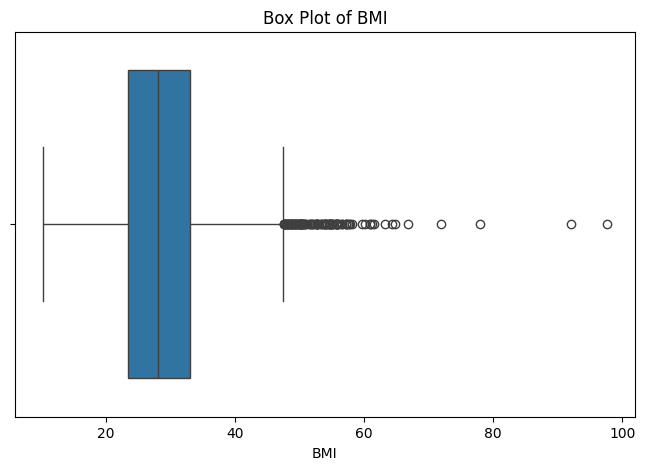

In [7]:
# 1. Check the percentage of missing BMI values
missing_bmi_count = df['bmi'].isnull().sum()
total_count = len(df)
missing_bmi_percentage = (missing_bmi_count / total_count) * 100

print(f"Missing BMI Values: {missing_bmi_count} out of {total_count} entries")
print(f"Percentage of Missing BMI Values: {missing_bmi_percentage:.2f}%")

# 2. Generate a box plot for the BMI column to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

In [8]:
# Check the skewness of the BMI column
bmi_skewness = df['bmi'].skew()
print(f"Skewness of the BMI column: {bmi_skewness:.2f}")

Skewness of the BMI column: 1.06


In [9]:
# Calculate the median of the BMI column
bmi_median = df['bmi'].median()

# Impute missing BMI values with the median
df['bmi'].fillna(bmi_median, inplace=True)

# Confirm that missing values have been filled
print(f"Missing BMI values after imputation: {df['bmi'].isnull().sum()}")

Missing BMI values after imputation: 0


C:\Users\sarah\AppData\Local\Temp\ipykernel_20352\1019290277.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_median, inplace=True)


### Relationships Between Variables

In [11]:
from scipy.stats import pearsonr

# Prepare to store results
correlation_results = []

# Loop through each column except the target 'stroke'
for col in df.columns:
    if col != 'stroke':
        # Only compute for numeric columns
        if np.issubdtype(df[col].dtype, np.number):
            # Drop NA to avoid computation errors
            valid_data = df[[col, 'stroke']].dropna()
            r, p = pearsonr(valid_data[col], valid_data['stroke'])
            correlation_results.append({
                'Feature': col,
                'Pearson Coefficient': r,
                'P-Value': p
            })

# Convert to a DataFrame for display
correlation_df = pd.DataFrame(correlation_results)

# Display results sorted by absolute Pearson coefficient
correlation_df = correlation_df.reindex(correlation_df['Pearson Coefficient'].abs().sort_values(ascending=False).index)

print(correlation_df)

             Feature  Pearson Coefficient       P-Value
1                age             0.245257  7.030778e-71
3      heart_disease             0.134914  3.451927e-22
4  avg_glucose_level             0.131945  2.767811e-21
2       hypertension             0.127904  4.367557e-20
5                bmi             0.036110  9.837071e-03
0                 id             0.006388  6.479970e-01


#### The Pearson Coefficient measures the linear correlation between each variables and the stroke feature. If the result is +1, it tells us that there is a perfect positive correlation, 0 has no correlation, and a -1 is a negative correlation. The P-Value shows us if the correlation is statistically signidicant. If the result is < 0.05, it is a low p-value, which means the correlation is statistically significant. 


#### Therefore, based on the correlation results, the definite variables that are correlated with stroke feature are age, heart_disease, avg_glucose_level, and hypertension.

C:\Users\sarah\AppData\Local\Temp\ipykernel_20352\4042565098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


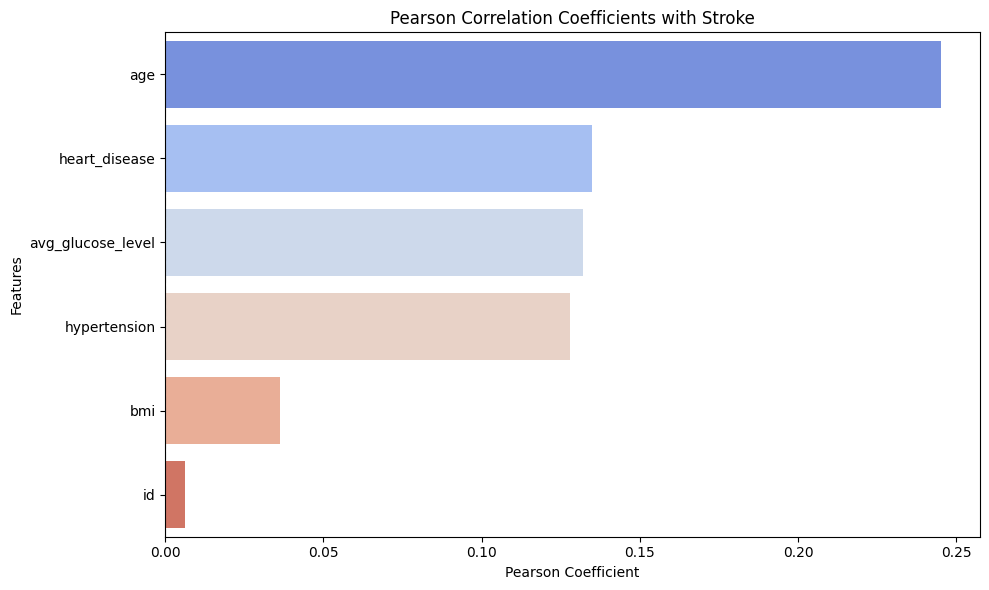

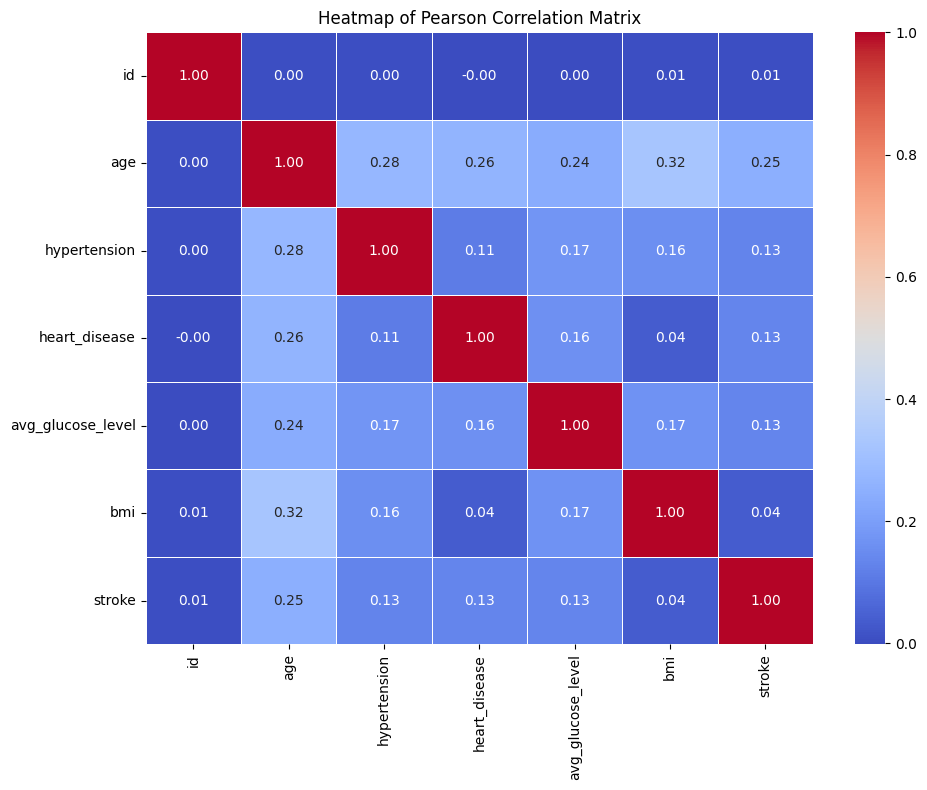

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Horizontal bar plot of Pearson Correlation Coefficients with 'stroke'
# Reuse correlation_df from previous step, or recompute if needed
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=correlation_df,
    x='Pearson Coefficient',
    y='Feature',
    palette='coolwarm',
    orient='h'
)
plt.title('Pearson Correlation Coefficients with Stroke')
plt.xlabel('Pearson Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='gray', linestyle='--')  # Add reference line at 0
plt.tight_layout()
plt.show()

# 2. Heatmap of Pearson Correlation Matrix (for all numeric features)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Heatmap of Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

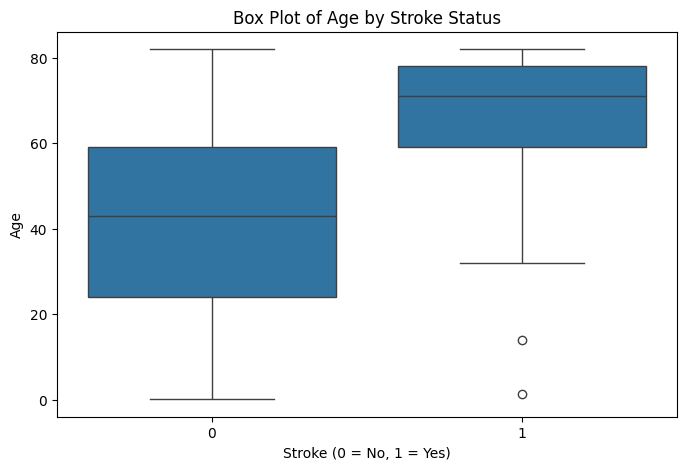

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Box Plot of Age by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

#### This regression box plot shows us that most strokes or stroke cases occur in older patients/individuals, mainly above the age of 60. This also shows us that age is a significant variable in predicting stroke.

## **Modeling Analysis**

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables
source_var = 'age'     # Replace with your chosen independent variable
target_var = 'stroke'  # Replace with your chosen target variable

# Drop NA values in relevant columns
data = df[[source_var, target_var]].dropna()

# Reshape input for sklearn
X = data[[source_var]]  # 2D array for sklearn
y = data[target_var]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict target values
y_pred = model.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.0602
Mean Squared Error: 0.0436


#### Although the Pearson correlation coefficient tells us that age is positively correlated with stroke, the R2 score tells us that only 6.02% of the variation in stoke is explained by age. 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define the target variable and source variables
target_var = 'stroke'  # Replace with your actual target column name
source_vars = ['age', 'avg_glucose_level', 'bmi']  # Replace with your chosen features

# Drop rows with missing values in selected columns
data = df[source_vars + [target_var]].dropna()

# Define X (independent variables) and y (dependent variable)
X = data[source_vars]
y = data[target_var]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score (Multivariable Linear Regression): {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score (Multivariable Linear Regression): 0.0688
Mean Squared Error: 0.0432


#### After using age, ave_glucose_level, and bmi as predictors to estimate the likelihood of stroke, the R2 score tells us that only 6.88% of the variation in stroke occurence is explained by the model.

### Polynomial Regression

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define target and source variables
target_var = 'stroke'  # Replace with your actual target
source_vars = ['age', 'avg_glucose_level', 'bmi']  # Replace with your actual features

# Drop NA values
data = df[source_vars + [target_var]].dropna()

# Define X and y
X = data[source_vars]
y = data[target_var]

# 1. Create pipeline with standard scaler, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear_model', LinearRegression())
])

# 2. Fit the pipeline
pipeline.fit(X, y)

# 3. Predict and evaluate
y_pred = pipeline.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score (Polynomial Regression with degree 2): {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score (Polynomial Regression with degree 2): 0.0899
Mean Squared Error: 0.0422


#### The Polynomial Regression R2 score of 8.99% is slightly better than the Linear Regression R2 scores; however it is still considered low.

### Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target attributes
source_vars = ['age', 'avg_glucose_level', 'bmi']  # Replace with your actual feature names
target_var = 'stroke'  # Replace with your actual target column

# Drop rows with missing values
data = df[source_vars + [target_var]].dropna()

# Split the data into training and testing sets (80% train, 20% test)
X = data[source_vars]
y = data[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge Regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression R² Score (Test Set): {r2:.4f}")
print(f"Ridge Regression Mean Squared Error (Test Set): {mse:.4f}")

Ridge Regression R² Score (Test Set): 0.0806
Ridge Regression Mean Squared Error (Test Set): 0.0524


#### The Ridge Regression model was applied to reduce potential overfitting. The model performed slightly better than the linear regression as the ridge regression's R2 score is 8.06% with an MSE of 0.0524; however, it still explains less than 9% of the variance in stroke outcome. There is a challenge in applying regression models to stroke prediction because of its binary classification. 

## **Hyperparameter Tuning**

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define your source and target attributes
source_vars = ['age', 'avg_glucose_level', 'bmi']  # Replace with actual features
target_var = 'stroke'  # Replace with your target

# Drop rows with missing values in selected columns
data = df[source_vars + [target_var]].dropna()
X = data[source_vars]
y = data[target_var]

# 1. Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create pipeline: scaling + polynomial features + Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

# 3. Grid Search for best alpha with cross-validation
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# 4. Predict and evaluate on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"R² Score on Test Set: {r2:.4f}")
print(f"Mean Squared Error on Test Set: {mse:.4f}")

Best Alpha: 100
R² Score on Test Set: 0.1004
Mean Squared Error on Test Set: 0.0513


#### The Best Alpha: 100 means stronger regularization gave the best model during cross-validation. The R2 score on Test Set is 10.04% which means the best model explains its percentage of the variation in stroke on unseen data. It is also the highest R2 score compared to the linear, polynomial, and ridge regression scores. This was the best-performing regression model, however the performance is limited due to the binary nature of stroke variable. 